In [1]:
from chesslab.agent_tf import agent
from chesslab.agent_stockfish import agent as s_agent
from chesslab.tests import kaufman_test
import chess
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import tensorflow as tf
class Model_3():

    def __init__(self,
                   n_classes=2):
        initializer = tf.keras.initializers.GlorotNormal()
        self.hw=[]
        self.hb=[]

        self.hw.append( tf.Variable(initializer(shape=(7,7,12,32),dtype=np.float32),name="hl1weigths",dtype="float32") )
        self.hb.append( tf.Variable(np.zeros(32,dtype=np.float32),name="hl1bias",dtype="float32") )
        #8x8x32
        self.hw.append( tf.Variable(initializer(shape=(5,5,32,64),dtype=np.float32),name="hl2weigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(64,dtype=np.float32),name="hl2bias",dtype="float32"))
        #8x8x64
        self.hw.append( tf.Variable(initializer(shape=(3,3,64,128),dtype=np.float32),name="hl3weigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(128,dtype=np.float32),name="hl3bias",dtype="float32"))
        #8x8x128
        self.hw.append( tf.Variable(initializer(shape=(8*8*128,256),dtype=np.float32),name="hl4weigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(256,dtype=np.float32),name="hl4bias",dtype="float32"))

        self.hw.append( tf.Variable(initializer(shape=(256, n_classes),dtype=np.float32),name="outweigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(n_classes,dtype=np.float32),name="outbias",dtype="float32"))

        self.trainable_variables = []
        for i in range(len(self.hw)):
            self.trainable_variables.append(self.hw[i])    
            self.trainable_variables.append(self.hb[i])

    def __call__(self,x): 

        out = tf.cast(x, tf.float32)
        out = tf.reshape(out, shape=[-1, 8, 8, 12])

        layer=0
        out = tf.nn.conv2d(out,self.hw[layer], strides=[1,1,1,1], padding='SAME')  
        out = tf.add(out, self.hb[layer])
        out = tf.nn.relu(out)
              #8*8*32
        layer+=1
        out = tf.nn.conv2d(out,self.hw[layer], strides=[1,1,1,1], padding='SAME')  
        out = tf.add(out, self.hb[layer])
        out = tf.nn.relu(out)
              #8*8*64
        layer+=1  
        out = tf.nn.conv2d(out,self.hw[layer], strides=[1,1,1,1], padding='SAME')  
        out = tf.add(out, self.hb[layer])
        out = tf.nn.elu(out)
              #8*8*128
        layer+=1
        out =  tf.reshape(out,[-1, 8*8*128])
        out =  tf.matmul(out,self.hw[layer])
        out = tf.add(out, self.hb[layer])
        out = tf.nn.relu(out)

        layer+=1
        out =  tf.matmul(out,self.hw[layer])
        out = tf.add(out, self.hb[layer])

        return out
model = Model_3()

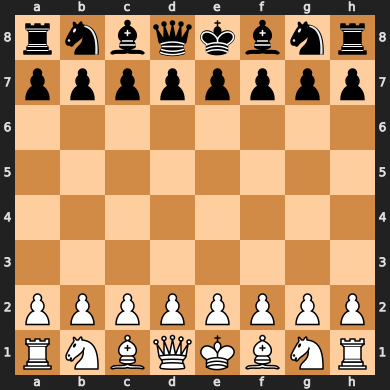

In [3]:
board=chess.Board()
board

In [4]:
base_name = './tmp/tf_weights-relu-elo3.1.{}.h5'
deepbot = agent(model,base_name.format(1))
move=deepbot.select_move(board)
move

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Move.from_uci('g2g4')

In [5]:
moves,values=deepbot.get_move_values(board)

In [6]:
moves

[Move.from_uci('g1h3'),
 Move.from_uci('g1f3'),
 Move.from_uci('b1c3'),
 Move.from_uci('b1a3'),
 Move.from_uci('h2h3'),
 Move.from_uci('g2g3'),
 Move.from_uci('f2f3'),
 Move.from_uci('e2e3'),
 Move.from_uci('d2d3'),
 Move.from_uci('c2c3'),
 Move.from_uci('b2b3'),
 Move.from_uci('a2a3'),
 Move.from_uci('h2h4'),
 Move.from_uci('g2g4'),
 Move.from_uci('f2f4'),
 Move.from_uci('e2e4'),
 Move.from_uci('d2d4'),
 Move.from_uci('c2c4'),
 Move.from_uci('b2b4'),
 Move.from_uci('a2a4')]

In [7]:
values

array([0.64437234, 0.6678311 , 0.6393428 , 0.61972195, 0.67387325,
       0.6829473 , 0.59687805, 0.6268035 , 0.59502256, 0.6160961 ,
       0.5959906 , 0.6610799 , 0.6856715 , 0.7120336 , 0.6242448 ,
       0.6788827 , 0.6821177 , 0.63576037, 0.6211664 , 0.6401737 ],
      dtype=float32)

In [8]:
from chesslab.utils import join_and_sort
join_and_sort(moves,values)

array([[Move.from_uci('g2g4'), 0.7120336294174194],
       [Move.from_uci('h2h4'), 0.6856715083122253],
       [Move.from_uci('g2g3'), 0.6829472780227661],
       [Move.from_uci('d2d4'), 0.6821177005767822],
       [Move.from_uci('e2e4'), 0.6788827180862427],
       [Move.from_uci('h2h3'), 0.673873245716095],
       [Move.from_uci('g1f3'), 0.6678311228752136],
       [Move.from_uci('a2a3'), 0.6610798835754395],
       [Move.from_uci('g1h3'), 0.6443723440170288],
       [Move.from_uci('a2a4'), 0.6401736736297607],
       [Move.from_uci('b1c3'), 0.6393427848815918],
       [Move.from_uci('c2c4'), 0.6357603669166565],
       [Move.from_uci('e2e3'), 0.6268035173416138],
       [Move.from_uci('f2f4'), 0.6242448091506958],
       [Move.from_uci('b2b4'), 0.6211664080619812],
       [Move.from_uci('b1a3'), 0.6197219491004944],
       [Move.from_uci('c2c3'), 0.6160960793495178],
       [Move.from_uci('f2f3'), 0.5968780517578125],
       [Move.from_uci('b2b3'), 0.5959905982017517],
       [Move.

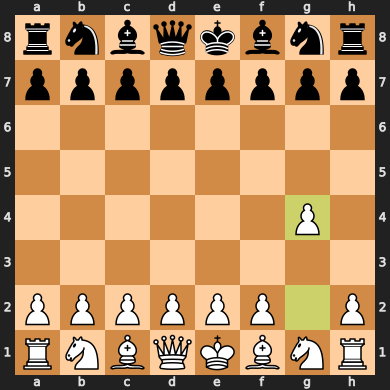

In [9]:
board.push(move)
board

In [10]:
kaufman_test(deepbot)

0.2

In [11]:
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Accuracy: 5/25 = 0.2 | weighted = 0.65
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 34 & 48 & 0.2979 & 0.7677 & g2g4 & 0.9072  \\
02 & f5d4 & 34 & 39 & 0.1316 & 0.5673 & h7h6 & 0.8671  \\
03 & e1d1 & 8 & 38 & 0.8108 & 0.5705 & b3b4 & 0.6753  \\
04 & b1b2 & 1 & 47 & 1.0000 & 0.9707 & b1b2 & 0.9707  \\
05 & g5c1 & 1 & 48 & 1.0000 & 0.4283 & g5c1 & 0.4283  \\
06 & a3a2 & 28 & 31 & 0.1000 & 0.1537 & h7h6 & 0.3982  \\
07 & b7e4 & 12 & 33 & 0.6562 & 0.2539 & e6e5 & 0.3190  \\
08 & h7h6 & 1 & 39 & 1.0000 & 0.4648 & h7h6 & 0.4648  \\
09 & f3e2 & 6 & 35 & 0.8529 & 0.7705 & h1f1 & 0.8010  \\
10 & d5c3 & 7 & 41 & 0.8500 & 0.4087 & g7g5 & 0.6340  \\
11 & g3f5 & 1 & 35 & 1.0000 & 0.9515 & g3f5 & 0.9515  \\
12 & c6d6 & 21 & 41 & 0.5000 & 0.3194 & e7e1 & 0.5038  \\
13 & c3d5 & 19 & 30 & 0.3793 & 0.6874 & f1f6 & 0.9227  \\
14 & b1b2 & 2 & 49 & 0.9792 & 0.8541 & d3g6 & 0.8548  \\
15 & d3f5 & 2 & 51 & 0.9800 & 0.7602 & g3f5 & 0.7746  \\
16 & b3b4 & 10 & 10 & 0.0000 & 0.3479 & e

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.767686,g2g4,0.907197,34,48,0.297872
1,f5d4,0.567312,h7h6,0.867054,34,39,0.131579
2,e1d1,0.570505,b3b4,0.675318,8,38,0.810811
3,b1b2,0.970663,b1b2,0.970663,1,47,1.000000
4,g5c1,0.428334,g5c1,0.428334,1,48,1.000000
5,a3a2,0.153750,h7h6,0.398163,28,31,0.100000
6,b7e4,0.253886,e6e5,0.318965,12,33,0.656250
7,h7h6,0.464761,h7h6,0.464761,1,39,1.000000
8,f3e2,0.770533,h1f1,0.801040,6,35,0.852941
9,d5c3,0.408728,g7g5,0.634045,7,41,0.850000


In [12]:
epochs=30
exact_acc = np.zeros(epochs)
weighted_acc = np.zeros(epochs)
train_acc_model = np.zeros(epochs)
test_acc_model = np.zeros(epochs)
for i in range(1,epochs+1):
    deepbot = agent(model,base_name.format(i))
    acc,acc_w,_  = kaufman_test(deepbot,details=1)
    exact_acc[i-1]=acc
    weighted_acc[i-1]=acc_w
    train_acc_model[i-1] = deepbot.history['train']['acc'][-1]
    test_acc_model[i-1] = deepbot.history['test']['acc'][-1]


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GP

In [13]:
path = 'E:/database/stockfish_14.exe'
stockfish = s_agent(path)
ss,ssp,_  = kaufman_test(stockfish,details=1)
print("Exactitud para función de stockfish usando prueba de Kaufman y prueba de Kaufman ponderada\n {} | {:.2f}".format(ss,ssp))
ss = np.repeat(ss,epochs)
ssp = np.repeat(ssp,epochs)

Exactitud para función de stockfish usando prueba de Kaufman y prueba de Kaufman ponderada
 0.24 | 0.61


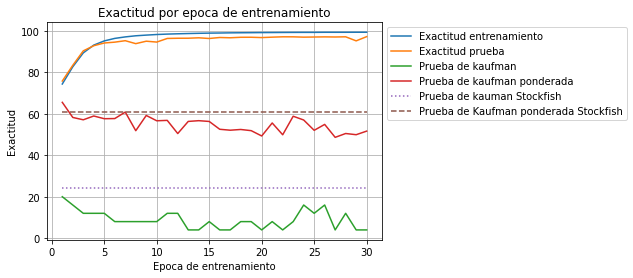

In [14]:
x = np.arange(epochs)+1
plt.plot(x,train_acc_model*100)
plt.plot(x,test_acc_model*100)
plt.plot(x,exact_acc*100)
plt.plot(x,weighted_acc*100)
plt.plot(x,ss*100,linestyle='dotted')
plt.plot(x,ssp*100,linestyle='dashed')
plt.title('Exactitud por epoca de entrenamiento')
plt.xlabel('Epoca de entrenamiento')
plt.ylabel('Exactitud')
plt.legend(['Exactitud entrenamiento','Exactitud prueba','Prueba de kaufman','Prueba de kaufman ponderada','Prueba de kauman Stockfish','Prueba de Kaufman ponderada Stockfish'],bbox_to_anchor=(1, 1),loc=2)
plt.grid()
plt.savefig('grafica.png',bbox_inches="tight")
plt.show()

In [15]:
train_acc_model

array([0.7429772 , 0.82607406, 0.89293712, 0.93047196, 0.95068884,
       0.96279967, 0.96998858, 0.97537577, 0.97864294, 0.9815076 ,
       0.9834981 , 0.9850108 , 0.9862541 , 0.98733956, 0.98818403,
       0.9887349 , 0.98952717, 0.9899469 , 0.99032652, 0.99081808,
       0.99105531, 0.99141115, 0.99164337, 0.9918263 , 0.99182588,
       0.99221724, 0.99217087, 0.99222976, 0.99240184, 0.99243605])

In [16]:
print('Epoca & Conjunto de & Conjunto & Prueba & Prueba de \\\\')
print(' & entrenamiento & de prueba & de Kaufman & Kaufman ponderada \\\\')
for i in range(epochs):
    print('{:02d} & {:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\'.format(i+1,100*train_acc_model[i],100*test_acc_model[i],100*exact_acc[i],100*weighted_acc[i]))
data = np.stack((train_acc_model,test_acc_model,exact_acc,weighted_acc),axis=1)
pd.DataFrame(data,index=x,columns=["Conjunto de entrenamiento","Conjunto de prueba","Prueba de kaufman","Prueba de kaufman ponderada"])

Epoca & Conjunto de & Conjunto & Prueba & Prueba de \\
 & entrenamiento & de prueba & de Kaufman & Kaufman ponderada \\
01 & 74.30 & 75.73 & 20.00 & 65.47 \\
02 & 82.61 & 83.32 & 16.00 & 58.19 \\
03 & 89.29 & 90.28 & 12.00 & 57.06 \\
04 & 93.05 & 92.75 & 12.00 & 58.89 \\
05 & 95.07 & 94.07 & 12.00 & 57.58 \\
06 & 96.28 & 94.47 & 8.00 & 57.66 \\
07 & 97.00 & 95.17 & 8.00 & 60.77 \\
08 & 97.54 & 93.75 & 8.00 & 51.81 \\
09 & 97.86 & 94.93 & 8.00 & 59.15 \\
10 & 98.15 & 94.51 & 8.00 & 56.58 \\
11 & 98.35 & 96.25 & 12.00 & 56.78 \\
12 & 98.50 & 96.35 & 12.00 & 50.43 \\
13 & 98.63 & 96.36 & 4.00 & 56.27 \\
14 & 98.73 & 96.56 & 4.00 & 56.63 \\
15 & 98.82 & 96.23 & 8.00 & 56.26 \\
16 & 98.87 & 96.71 & 4.00 & 52.49 \\
17 & 98.95 & 96.58 & 4.00 & 52.04 \\
18 & 98.99 & 96.81 & 8.00 & 52.40 \\
19 & 99.03 & 96.83 & 8.00 & 51.82 \\
20 & 99.08 & 96.68 & 4.00 & 49.26 \\
21 & 99.11 & 96.87 & 8.00 & 55.52 \\
22 & 99.14 & 97.04 & 4.00 & 49.85 \\
23 & 99.16 & 97.03 & 8.00 & 58.78 \\
24 & 99.18 & 96.88 & 1

,Conjunto de entrenamiento,Conjunto de prueba,Prueba de kaufman,Prueba de kaufman ponderada
1,0.742977,0.757340,0.20,0.654664
2,0.826074,0.833200,0.16,0.581878
3,0.892937,0.902756,0.12,0.570622
4,0.930472,0.927467,0.12,0.588909
5,0.950689,0.940671,0.12,0.575819
6,0.962800,0.944697,0.08,0.576554
7,0.969989,0.951684,0.08,0.607713
8,0.975376,0.937476,0.08,0.518065
9,0.978643,0.949275,0.08,0.591513
10,0.981508,0.945077,0.08,0.565815
